In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from config import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_X, train_Y = read_training_set()
test_X = read_test_set()

In [3]:
print('train_X.shape =', train_X.shape)
print('train_Y.shape =', train_Y.shape)
print('test_X.shape =', test_X.shape)

train_X.shape = (42000, 784)
train_Y.shape = (42000, 10)
test_X.shape = (28000, 784)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


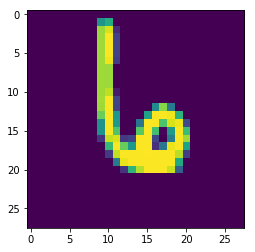

In [4]:
print(train_Y[123])
plot_image(train_X[123])

In [5]:
# preprocessing
train_X = train_X / 255
test_X = test_X / 255

In [6]:
model = Sequential()

# model.add(Dense(units=256, input_dim=train_X.shape[0]))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(units=128, input_dim=HEIGHT*WIDTH))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=CLASS_NUM))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
__________

In [9]:
# train model
model.fit(train_X, train_Y, batch_size=256, epochs=64, verbose=2)

Epoch 1/64
 - 3s - loss: 1.0239 - acc: 0.6631
Epoch 2/64
 - 2s - loss: 0.4770 - acc: 0.8613
Epoch 3/64
 - 1s - loss: 0.3827 - acc: 0.8914
Epoch 4/64
 - 2s - loss: 0.3265 - acc: 0.9070
Epoch 5/64
 - 1s - loss: 0.2964 - acc: 0.9166
Epoch 6/64
 - 1s - loss: 0.2751 - acc: 0.9220
Epoch 7/64
 - 2s - loss: 0.2509 - acc: 0.9302
Epoch 8/64
 - 2s - loss: 0.2319 - acc: 0.9351
Epoch 9/64
 - 1s - loss: 0.2173 - acc: 0.9393
Epoch 10/64
 - 1s - loss: 0.2134 - acc: 0.9400
Epoch 11/64
 - 1s - loss: 0.2057 - acc: 0.9409
Epoch 12/64
 - 2s - loss: 0.1902 - acc: 0.9451
Epoch 13/64
 - 2s - loss: 0.1946 - acc: 0.9430
Epoch 14/64
 - 1s - loss: 0.1795 - acc: 0.9492
Epoch 15/64
 - 1s - loss: 0.1717 - acc: 0.9507
Epoch 16/64
 - 1s - loss: 0.1681 - acc: 0.9516
Epoch 17/64
 - 1s - loss: 0.1644 - acc: 0.9524
Epoch 18/64
 - 1s - loss: 0.1576 - acc: 0.9559
Epoch 19/64
 - 1s - loss: 0.1526 - acc: 0.9562
Epoch 20/64
 - 1s - loss: 0.1504 - acc: 0.9571
Epoch 21/64
 - 1s - loss: 0.1513 - acc: 0.9575
Epoch 22/64
 - 1s - lo

In [10]:
# make prediction
preds = model.predict(test_X)
preds = np.argmax(preds, axis=1)

In [11]:
preds[1234]

4

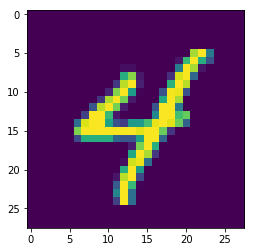

In [12]:
plot_image(test_X[1234])

In [13]:
# output file
write_predictions(preds)